In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("E:\Ranalysis\Titanic-Dataset.csv")
data.shape

(891, 12)

In [3]:
pd.set_option('display.max.rows',891)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

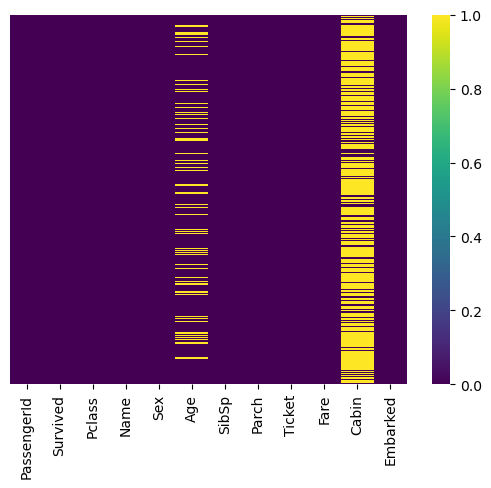

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [8]:
data.dropna(subset=['Embarked'],inplace = True)

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [10]:
data.drop('Cabin',axis=1,inplace = True)

<Axes: >

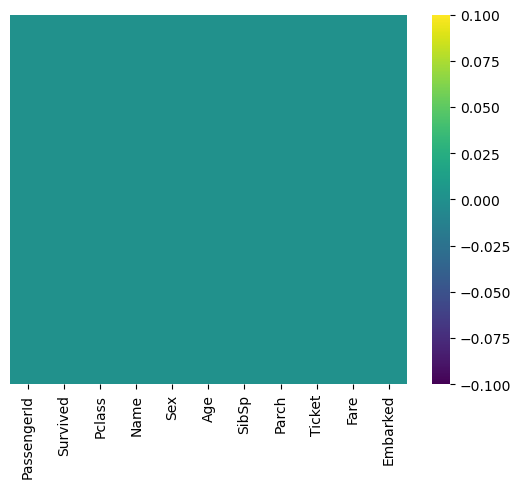

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
pclass = pd.get_dummies(data['Pclass'],drop_first = True)
sex = pd.get_dummies(data['Sex'],drop_first = True)
embarked = pd.get_dummies(data['Embarked'],drop_first = True)
print(pclass.head())
print(sex.head())
print(embarked.head())

   2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1
   male
0     1
1     0
2     0
3     0
4     1
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [14]:
data1 = pd.concat([data,pclass,sex,embarked],axis=1)

In [15]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


<Axes: xlabel='Survived', ylabel='Density'>

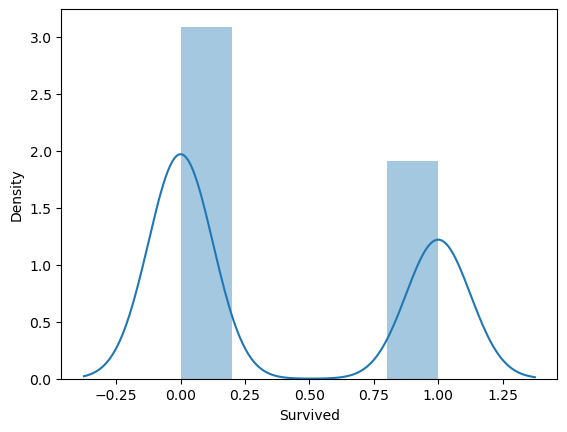

In [22]:
sns.distplot(data1['Survived'])

<Axes: xlabel='Survived', ylabel='Density'>

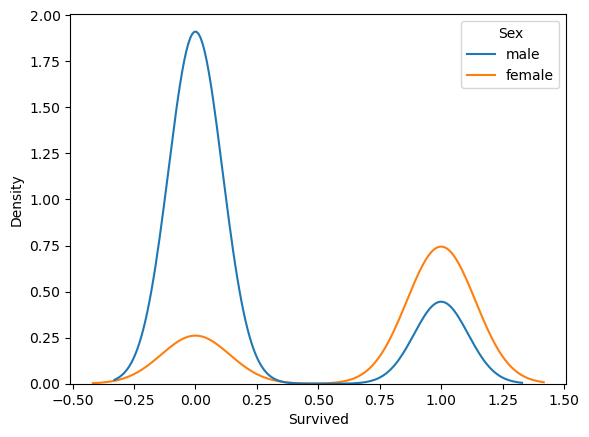

In [17]:
sns.kdeplot(data = data,x='Survived',hue = 'Sex')

In [18]:
data1.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
Survived,,,,,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549
1,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340


In [19]:
data1.groupby('male').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,Q,S
male,,,,,,,,,,,,,,,
0,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312
1,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577


In [20]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
data.corr();

<Axes: >

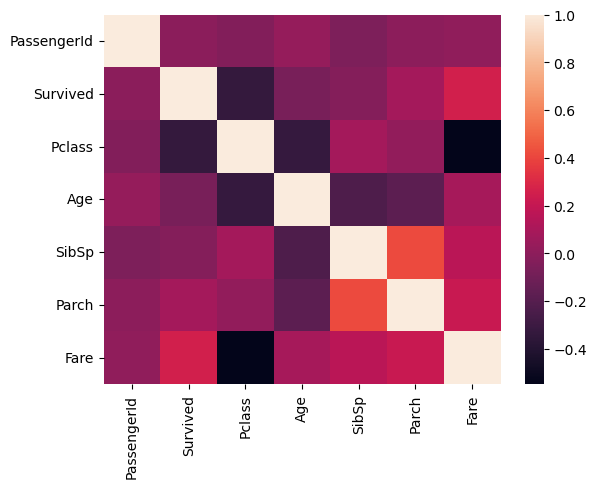

In [24]:
sns.heatmap(data.corr())

In [25]:
data1.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',    'Embarked',             2,
                   3,        'male',           'Q',           'S'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='Survived'>

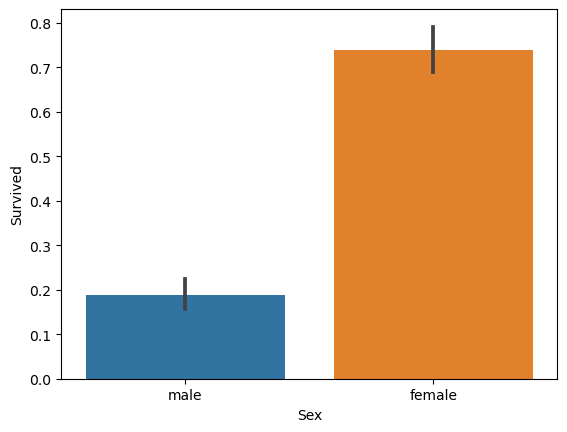

In [26]:
sns.barplot(data=data1,y='Survived',x = 'Sex')

In [27]:
data1.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
Survived,,,,,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549
1,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340


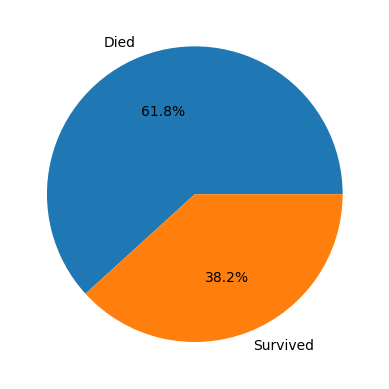

In [28]:
plt.pie(data1.groupby('Survived')['Sex'].count(),autopct = '%.1f%%',labels=['Died','Survived']);

<Axes: xlabel='Age', ylabel='Count'>

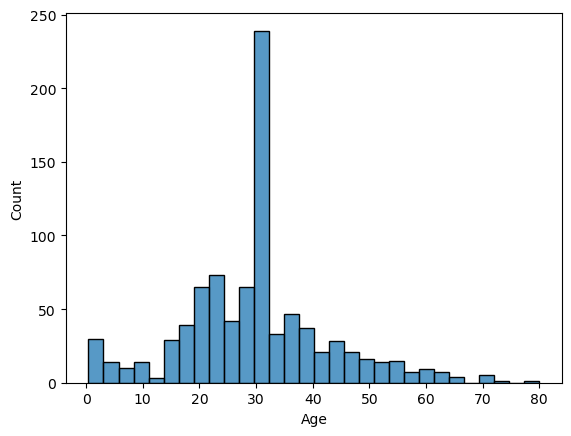

In [29]:
sns.histplot(data=data1,x='Age')

<Axes: xlabel='Age', ylabel='Density'>

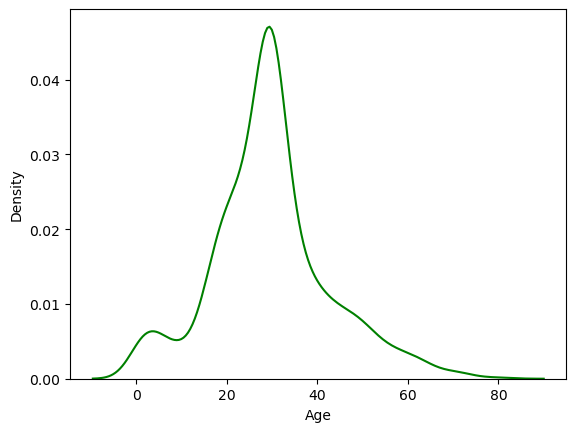

In [30]:
sns.kdeplot(data=data1,x='Age',color = 'green')

<Axes: xlabel='Age'>

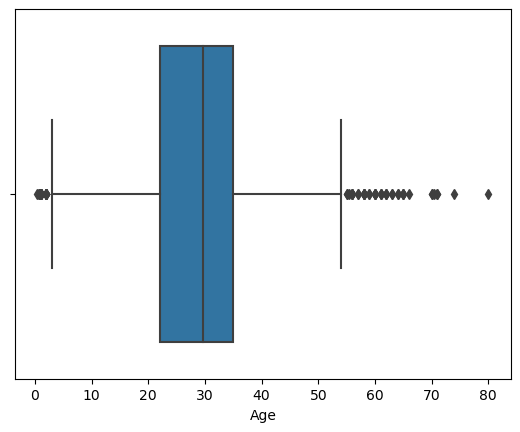

In [31]:
sns.boxplot(data=data1,x='Age')

In [32]:
round(data['Age'].mean(),2)

29.64

In [35]:
data1.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [34]:
data2 = data1.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare','Embarked'],axis=1,inplace = True)

In [36]:
data1.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [37]:
y = data1.iloc[:,0]
#X = data1.drop(['Survived'],axis=1,inplace=True)
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
X = data1.drop('Survived',axis=1)

In [39]:
X.head()
X.columns = X.columns.astype(str)
X.columns

Index(['Age', 'SibSp', 'Parch', '2', '3', 'male', 'Q', 'S'], dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=13)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)*100


80.89887640449437

In [42]:
import joblib
joblib.dump(model,'Titanicmodel.lib')
model=joblib.load('Titanicmodel.lib')
model

LogisticRegression()

In [43]:
data1.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [44]:
model.predict([[90,0,0,0,1,1,0,0]])

array([0], dtype=int64)